In [94]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage.color import label2rgb
from skimage.filters import laplace
from skimage.measure import perimeter
from scipy.stats import entropy
import data
from matplotlib import rcParams
rcParams['markers.fillstyle'] = 'none'

In [23]:
dataset = (x_train, y_train), (x_test, y_test) = data.load_dataset()

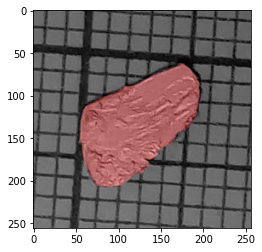

In [29]:
i = np.random.randint(len(x_train))
plt.imshow(label2rgb(y_train[i], x_train[i]))

In [32]:
pieces = {
    'inner':{'train':[], 'test':[]},
    'outter':{'train':[], 'test':[]}
}
for split, (X, Y) in zip(('train', 'test'), dataset):
    for x, y in zip(X, Y):
        pieces['inner'][split].append(x[y.astype(bool)])
        pieces['outter'][split].append(x[~y.astype(bool)])

In [95]:
def scatter(func1, func2):
    plt.xlabel(func1.__name__)
    plt.ylabel(func2.__name__)
    func1, func2 = data.mapper(func1), data.mapper(func2)
    for region, part in pieces.items():
        for i, (split, values) in enumerate(part.items()):
            plt.scatter(func1(values), func2(values), 
                        marker='o' if region == 'inner' else 'v', c=f'C{3*i}', label=f'{region} + {split}', alpha=0.7)
    plt.legend()
    plt.show()

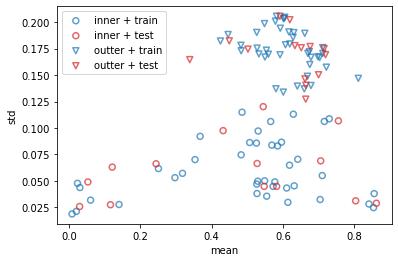

In [106]:
scatter(np.mean, np.std)

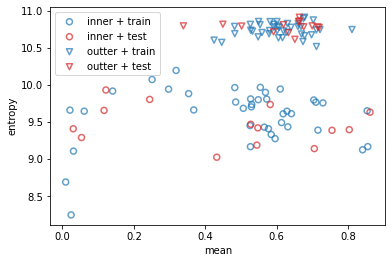

In [100]:
scatter(np.mean, entropy)

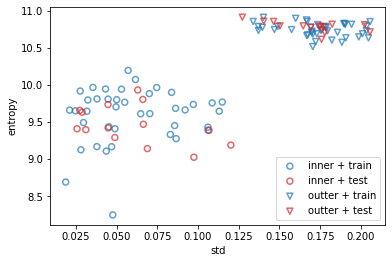

In [98]:
scatter(np.std, entropy)